## **Student Performance Indicator**

**Life cycle of Machine learning Project**

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

**1) Problem statement**

THis project understand how the student's performance (maths,reading, writing score) is affected by other variables such as gender, ethnicity, parent's education, etc.


**2) Data Collection**
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

**2.1 Import Data and Required Packages**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

IMPORTING CSV AS PANDAS DATAFRAME

In [6]:
df=pd.read_csv('data/stud.csv')

SHOW TOP 5 RECORDS

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


SHARE OF DATA

In [8]:
df.shape

(1000, 8)

**2.2 DATASET INFORMATION**

- **Gender**: Student's sex (Male/Female)
- **Race/Ethnicity**: Student's ethnic background (Group A, B, C, D, E)
- **Parental Education Level**: Highest education attained by parents  
  (Bachelor’s Degree, Some College, Master’s Degree, Associate’s Degree, High School)
- **Lunch Status**: Type of lunch before the test (Standard or Free/Reduced)
- **Test Preparation Course**: Completion status of the preparation course  
  (Completed/Not Completed)
- **Math Score**: Student’s performance in mathematics
- **Reading Score**: Student’s performance in reading
- **Writing Score**: Student’s performance in writing


### Data Checks to Perform

1. **Check Missing Values**: Identify any null or missing data in the dataset.
2. **Check Duplicates**: Detect and remove duplicate records.
3. **Check Data Types**: Verify that each column has the expected data type.
4. **Check Unique Values Per Column**: Count the number of distinct values for each column.
5. **Check Dataset Statistics**: Analyze summary statistics like mean, median, min, and max values.
6. **Check Categorical Column Categories**: List the different categories present in categorical columns.

### 3.1 **Checking for  Missing values**

In [9]:
df.duplicated().sum()

np.int64(0)

There are no missing Values in the dataset

## **3.2 Checking duplicates.**

In [10]:
df.duplicated().sum()

np.int64(0)

There are no Duplicates in the dataset

## **3.3 Checking data types**

In [11]:
# checking null values and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## **3.4 Checking the numbers of Unique values in each column**

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## **3.5 Checking the Statistics of the Data**


In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**

- From the above description, we can see that there are no NA values in the dataset, all columns are of numeric datatype. 
-From above description of numerical data, all means are very close to each other - between 66 and 68.05;
-From above description of numerical data, all standard deviations are very close to each other - between 14.6 and 15.19;
-From above description of numerical data, there is a similar distribution in most of the variables.
-While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17


## **3.7 Exploring Data**

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [16]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


## **3.8 Adding columns for "Total Score" and "Average**

In [17]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [19]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Insights**
1. The students have performed the worst in Maths
2. The students have performed the best in reading
3. The students have performed the best in writing
4. The students have performed the worst in science
5. The students have performed the worst in social studies

**Conclusion**
From above values we get students have performed the worst in Maths
Best performance is in reading section

## **4. Exploring Data ( Visualization )**

## *4.1 Visualize average score distribution to make some conclusions.*
- Histogram
- Kernel Distribution Function (KDE)

4.1.1 Histogram & KDE Plot

<Axes: xlabel='average', ylabel='Count'>

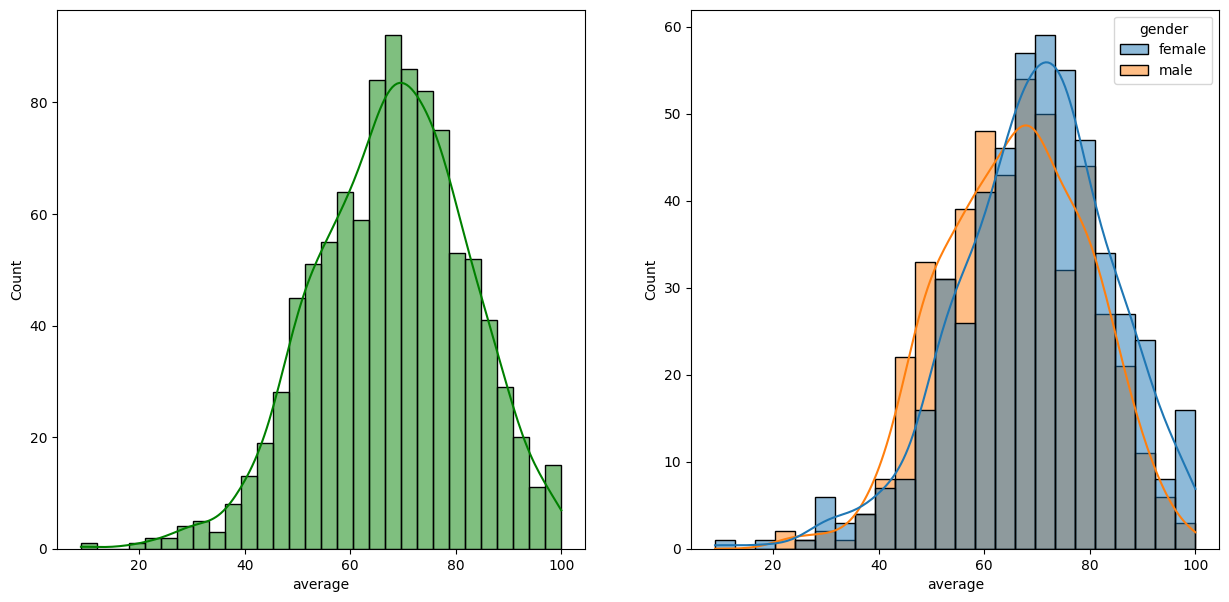

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

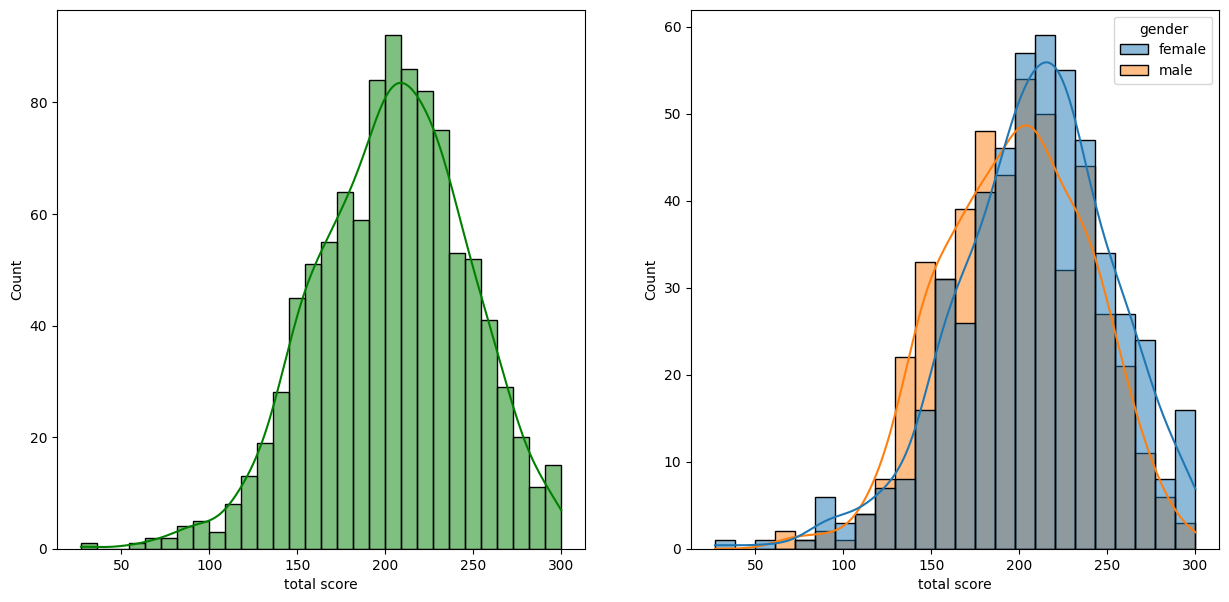

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Insights:
1) Female students outperformed male students: 
    a) Female students had better grades on average.
    b) Female students had better test preparation course completion rates.
    c) Female students had better parental level of education.
2) Group E had the highest average test scores.
3) Group C had the highest completion rates for test preparation courses.
4) Group C had the highest average parental level of education.

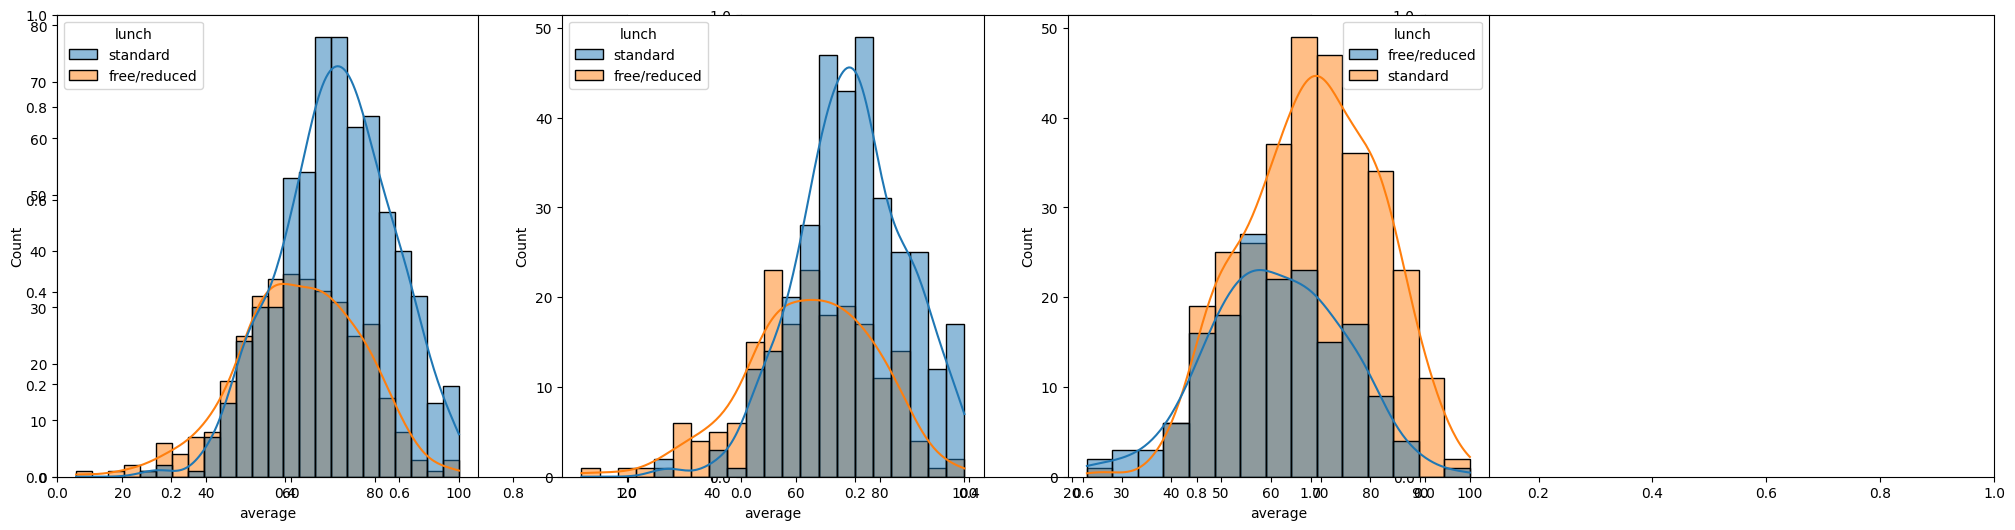

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

**Insights** 

- Standard lunch students have more average score than students with free/reduced lunch.


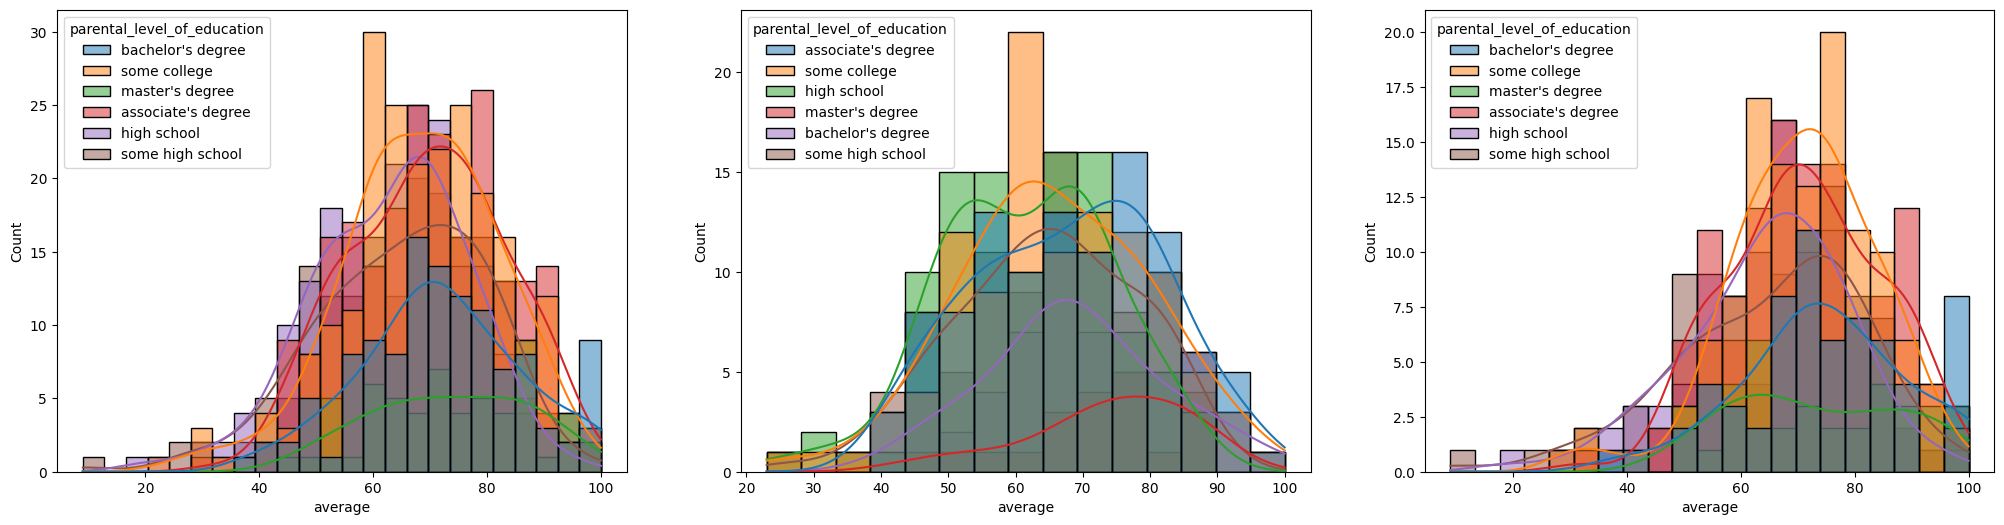

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)  # Changed from 141 to 131
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(132)  # Changed from 142 to 132
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(133)  # Changed from 143 to 133
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

**Insights**

- Parents Education don't have much to do with the score.
- Parents whose education is master's degree have students scoring 50 marks on average.



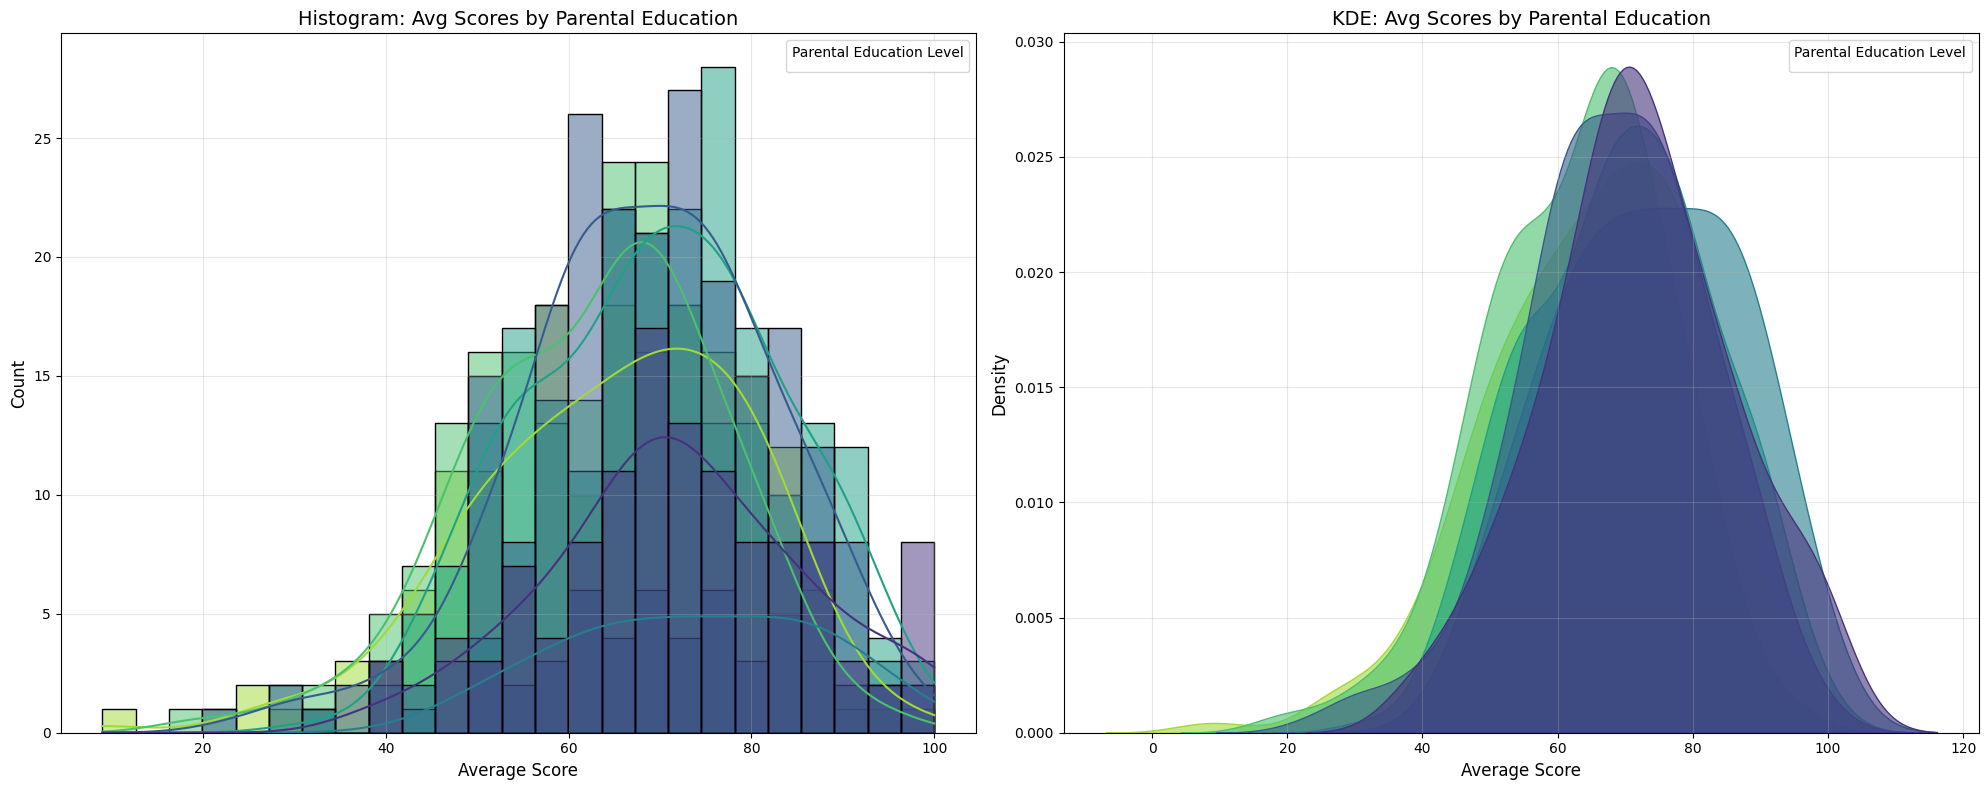

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

# Histogram Plot
sns.histplot(
    data=df, 
    x='average', 
    hue='parental_level_of_education',
    kde=True,
    alpha=0.5,
    bins=25,
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Histogram: Avg Scores by Parental Education', fontsize=14)
axes[0].set_xlabel('Average Score', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(alpha=0.3)
axes[0].legend(title='Parental Education Level')

# KDE Plot
sns.kdeplot(
    data=df, 
    x='average', 
    hue='parental_level_of_education',
    fill=True,
    common_norm=False,
    alpha=0.6,
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('KDE: Avg Scores by Parental Education', fontsize=14)
axes[1].set_xlabel('Average Score', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].grid(alpha=0.3)
axes[1].legend(title='Parental Education Level')

plt.tight_layout()
plt.show()


**Insights**
1. Female students outperformed male students in almost all categories.
2. Students from Group E have the highest average scores, while students from Group A have the lowest.
3. Students with "some college" or "associate's degree" as their parental level of education tend to have higher average scores.
4. Students who had a "standard" lunch performed better than those who had a "free/reduced" lunch.
5. Students who completed the test preparation course tended to have higher average scores than those who did not.  

**4.2 Maximum score of students in all three subjects**

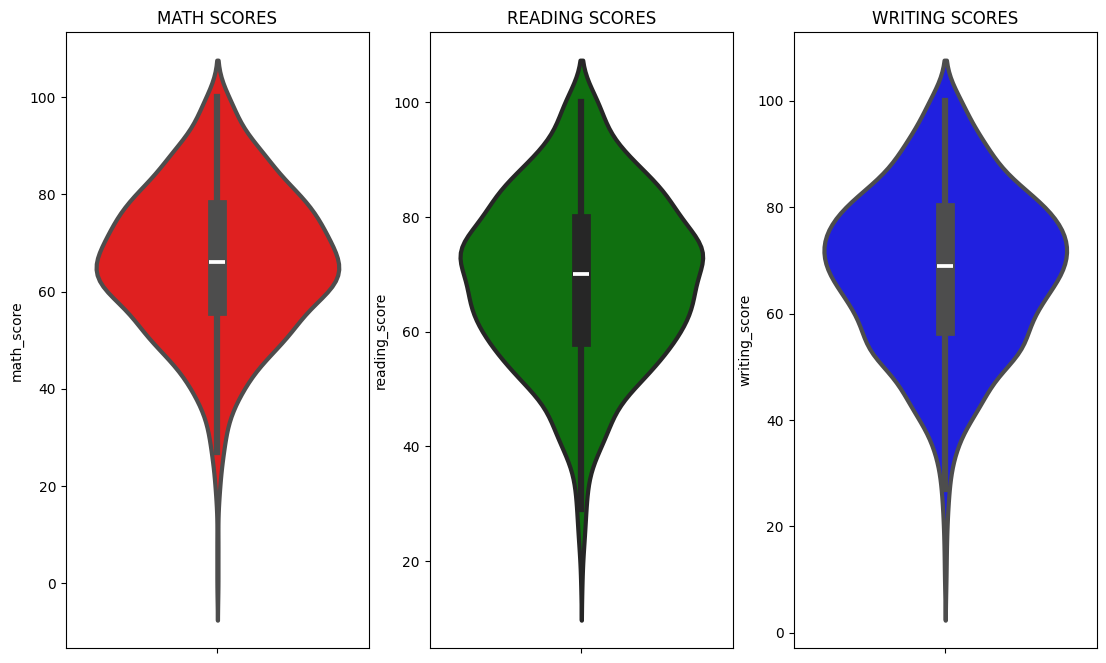

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

**Insights**

- The violin plots show the distribution of math, reading, and writing scores. The distributions are not perfectly normal, but they are somewhat symmetrical. The distributions for reading and writing scores are slightly more symmetrical than the distribution for math scores.


## 4.3 Multivariate analysis using pieplots


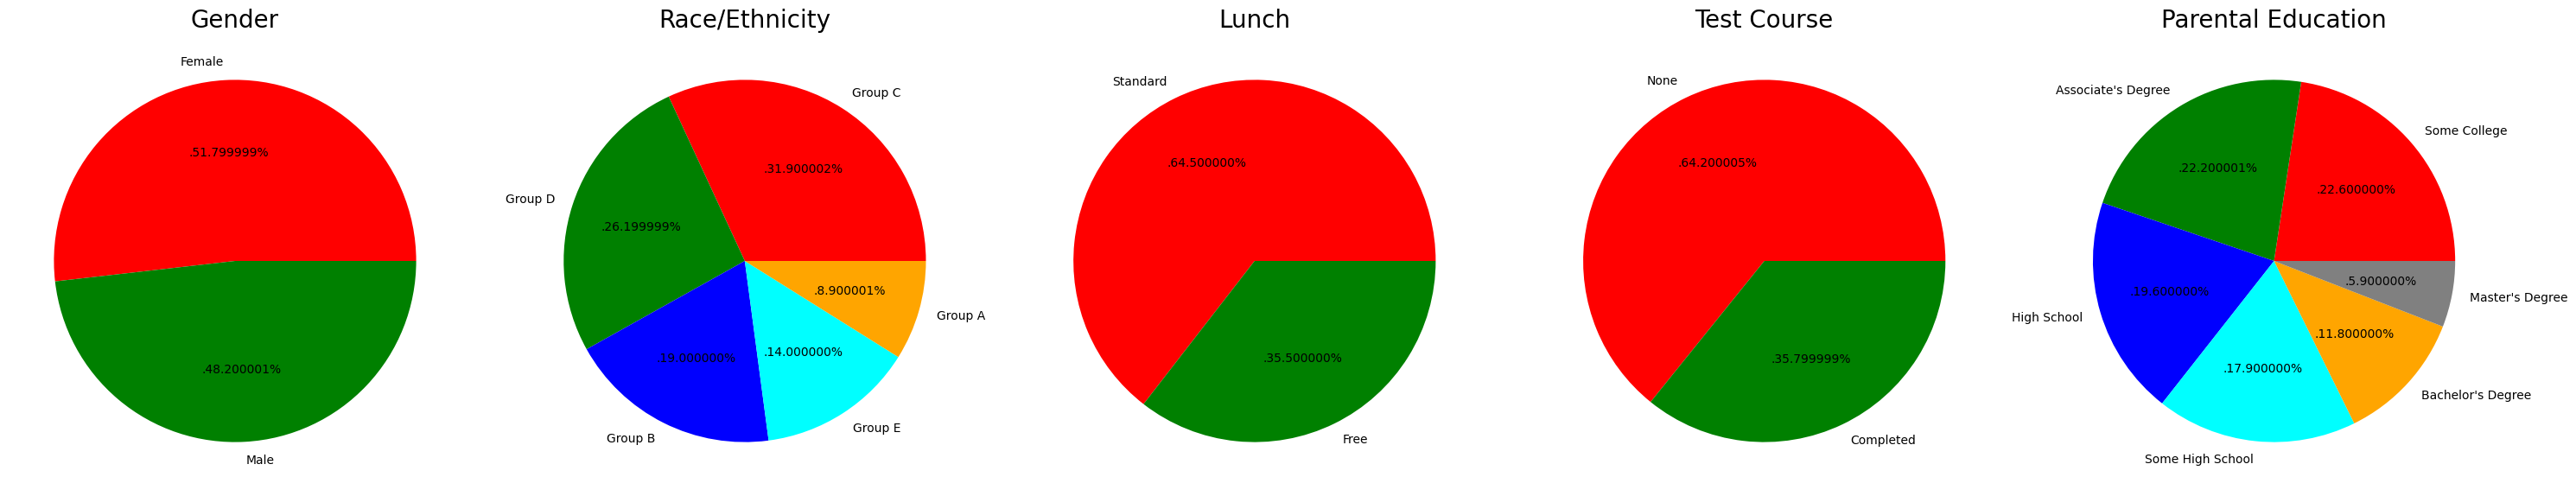

In [26]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

Insights



- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# **4.4 Feature Wise Visualization**

# 4.4.1 GENDER COLUMN

- How is the distribution of male and female students?
- Does gender has any impact on student's performance ? 

### UNIVARIATE ANALYSIS ( How is the distribution of male and female students? )

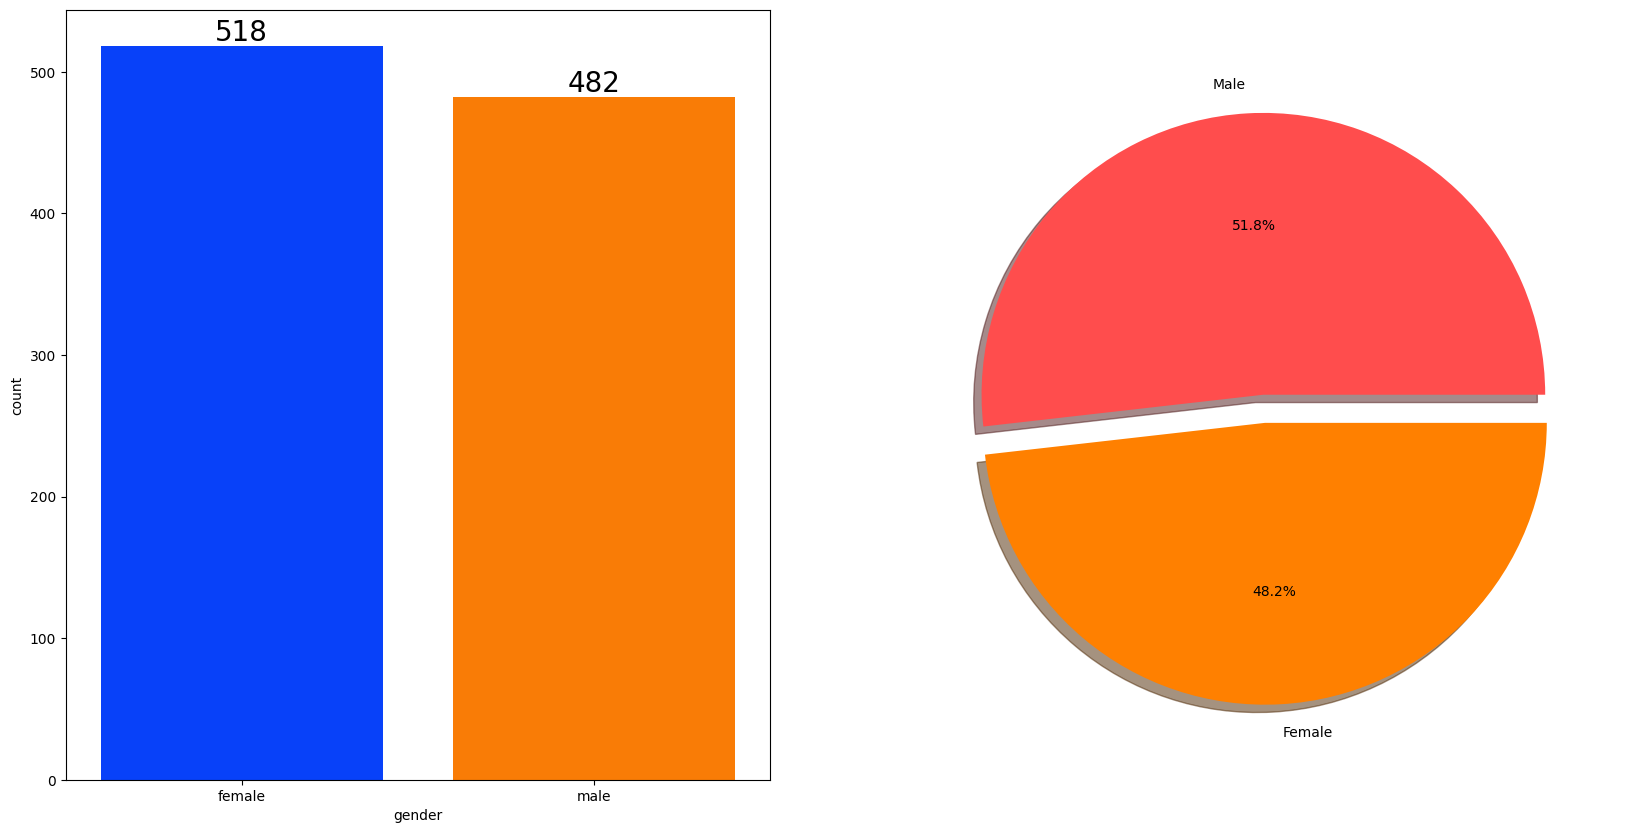

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights

- Gender: has balanced data with female students are 518 (48%) and male students are 512 (52%)
- Race/Ethnicity: Group C, Group B, and Group E are each 19%, Group A is 18%, and Group D is 17%
- Parental Level of Education: 15-16% of parents have a master's degree, 22-23% have at least a bachelor's degree, 17-18% have some college, 18-19% have a high school degree, and 16-17% have a high school degree
- Lunch: Standard lunch is more common (64%, 35%)


BIVARIATE ANALYSIS (Does gender has any impact on student's performance )

In [28]:
# Only include numeric columns in the groupby mean calculation
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


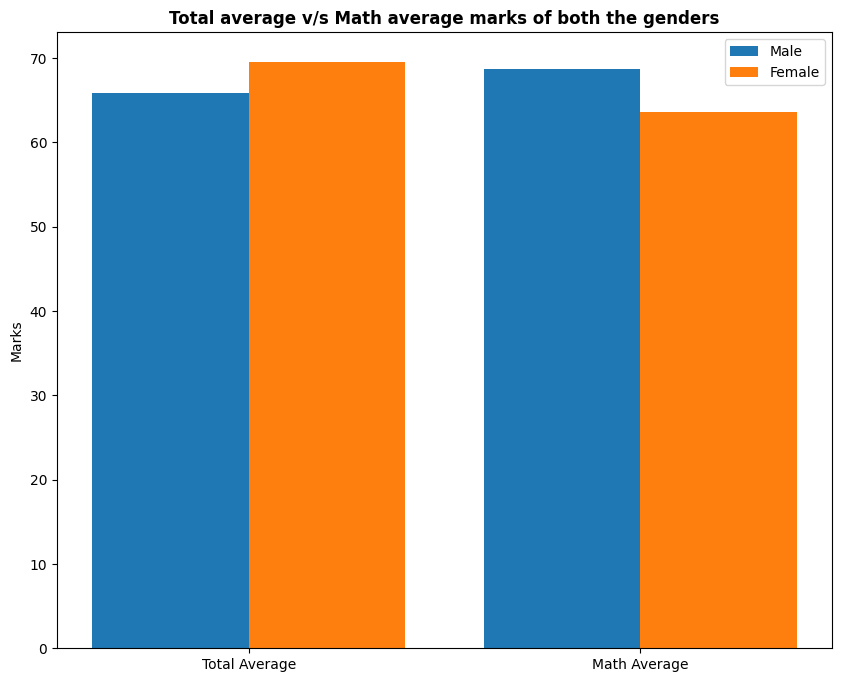

In [29]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

# Fix column names to match the actual dataframe columns
female_scores = [gender_group['average']['female'], gender_group['math_score']['female']]
male_scores = [gender_group['average']['male'], gender_group['math_score']['male']]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights

- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

# 4.4.2 RACE/ETHNICITY COLUMN

- How is Group distribution of Students?
- Does Is Race/Ehnicity has any impact on student's performance ?


## UNIVARIATE ANALYSIS (How is the group distrubution of students )    

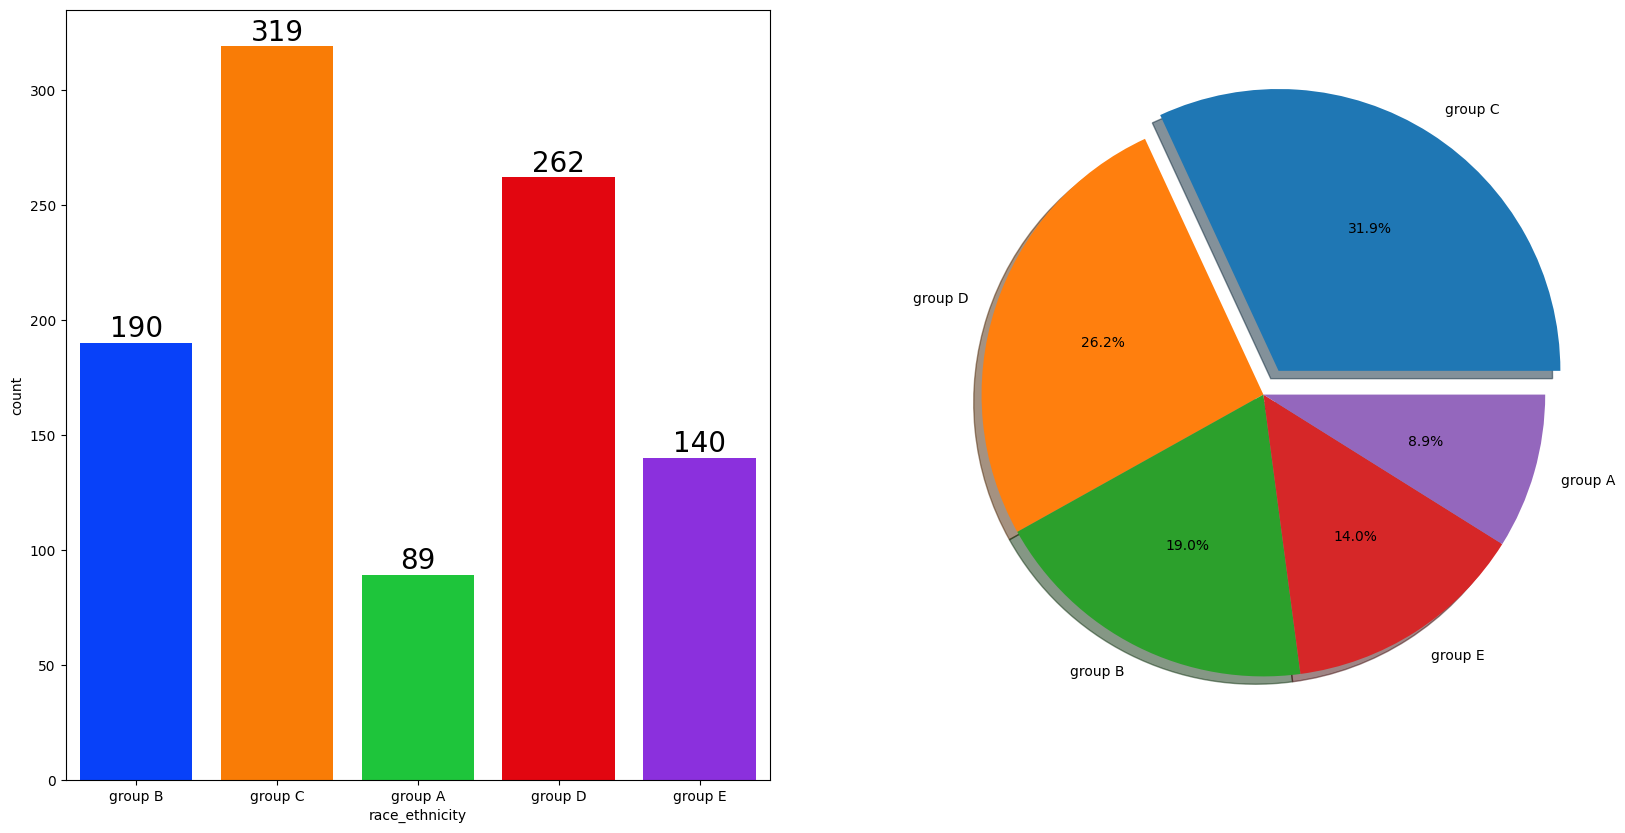

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Insights

- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

## BIVARIATE ANALYSIS (Does Is Race/Ehnicity has any impact on student's performance ?)

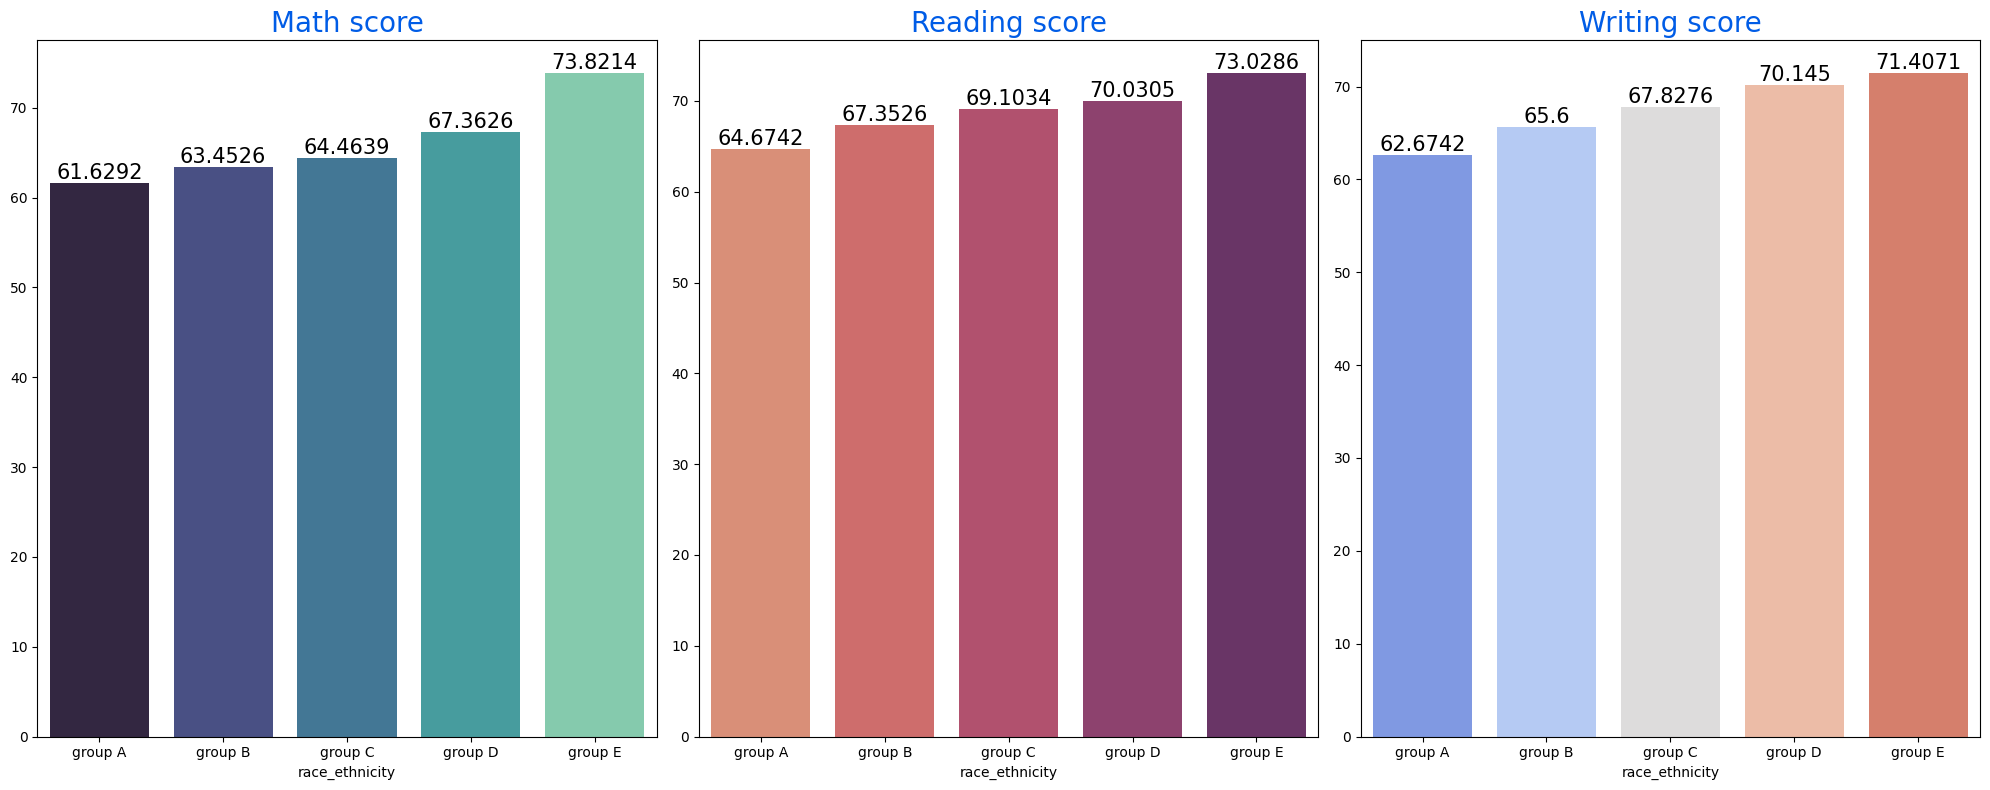

In [31]:
 # Fix column names to match the actual dataframe columns
Group_data2 = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

Insights 

- Group E students consistently achieved the highest average scores across math, reading, and writing.
- Group A students scored the lowest on average in all three subject areas.
- There appears to be a correlation between racial/ethnic groups and academic performance, which may reflect broader socioeconomic factors.
- The performance gap between the highest and lowest performing groups remains consistent across all three subjects.
- Reading scores tend to be higher than math scores for most groups, suggesting subject-specific strengths and challenges.

# 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

- what is the educational background of the students Parent?
- Does the parent education level have any impact on the student's performance?
- Is there a gender gap in the student's performance?
- Is there a relationship between the student's performance and the type of lunch they have?
- Is there a relationship between the student's performance and the test preparation course?
- Is there a relationship between the student's performance and the race/ethnicity?
- Is there a relationship between the student's performance and the gender?


## UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

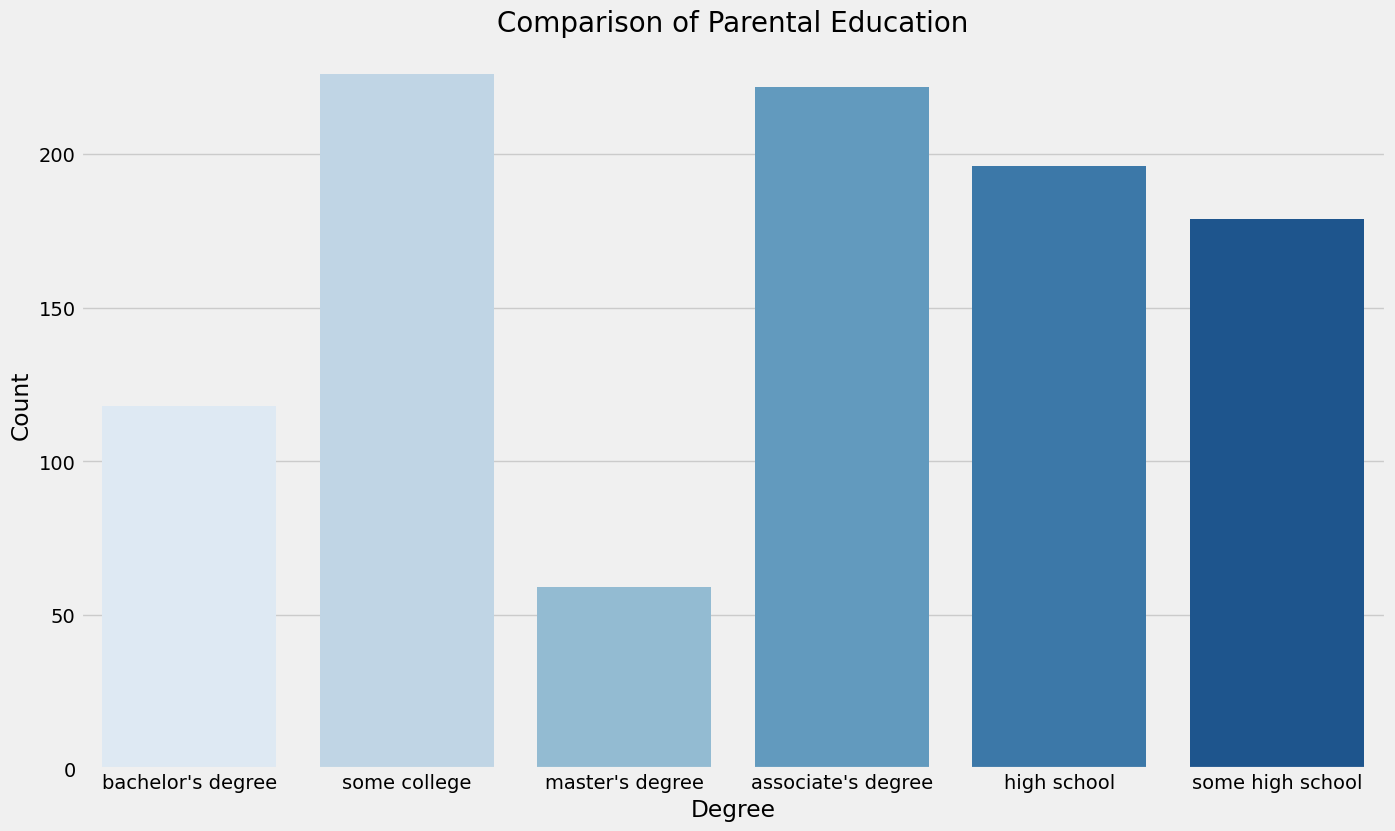

In [33]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

Insights

- Most parents have "some college" education, making it the most common category.
- There are fewer parents with advanced degrees like master's degrees.
 

# BIVARIATE ANALYSIS (Does the parent education level have any impact on the student's performance)


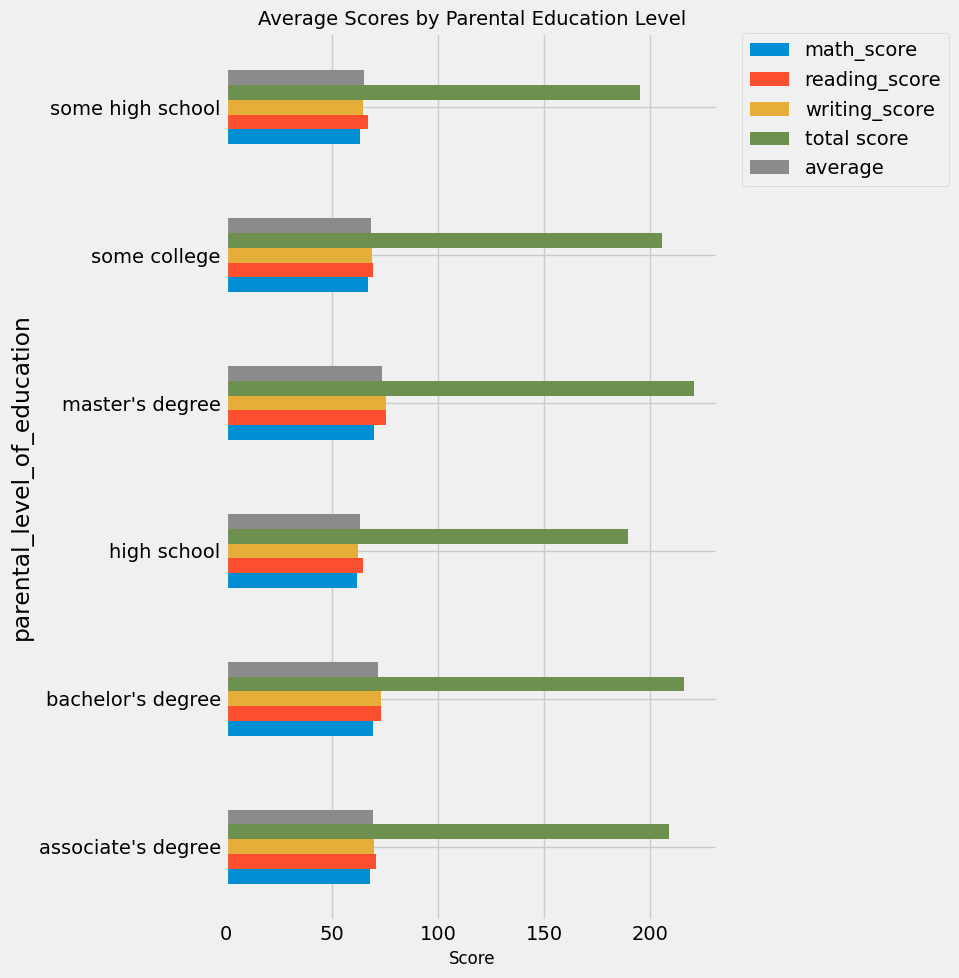

In [36]:
# Fix column name and specify numeric_only for agg function
df.groupby('parental_level_of_education').agg('mean', numeric_only=True).plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Average Scores by Parental Education Level', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.tight_layout()
plt.show()

Insights

- Students whose parents have higher education levels (master's or bachelor's degrees) tend to score better on average.
- There's a clear upward trend in student performance as parental education increases.
- The biggest performance gap appears between students whose parents have "some high school" education and those with advanced degrees.
- This suggests that the home educational environment and parental academic background significantly influence student achievement.
- Students with parents who completed college-level education consistently perform above the overall average.

## 4.4.4 LUNCH COLUMN

- Which type of lunch is most common among students ?
- What is the effect of lunch type on test results?


# UNIVARIATE ANALYSIS  ( Which type of lunch is most common amoung students ? )

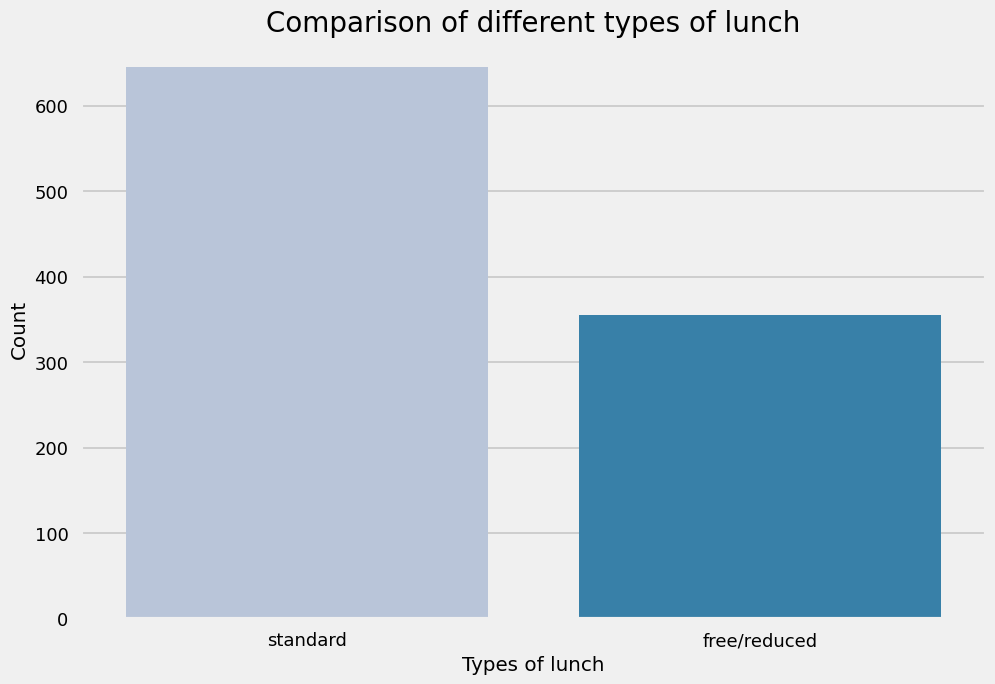

In [39]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')  # Updated style name for newer seaborn versions
sns.countplot(x=df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')
plt.show()

iNSIGHTS

- Students being served Standard lunch was more than free lunch

# BIVARIATE ANALYSIS (What is the effect of lunch type on test results?)

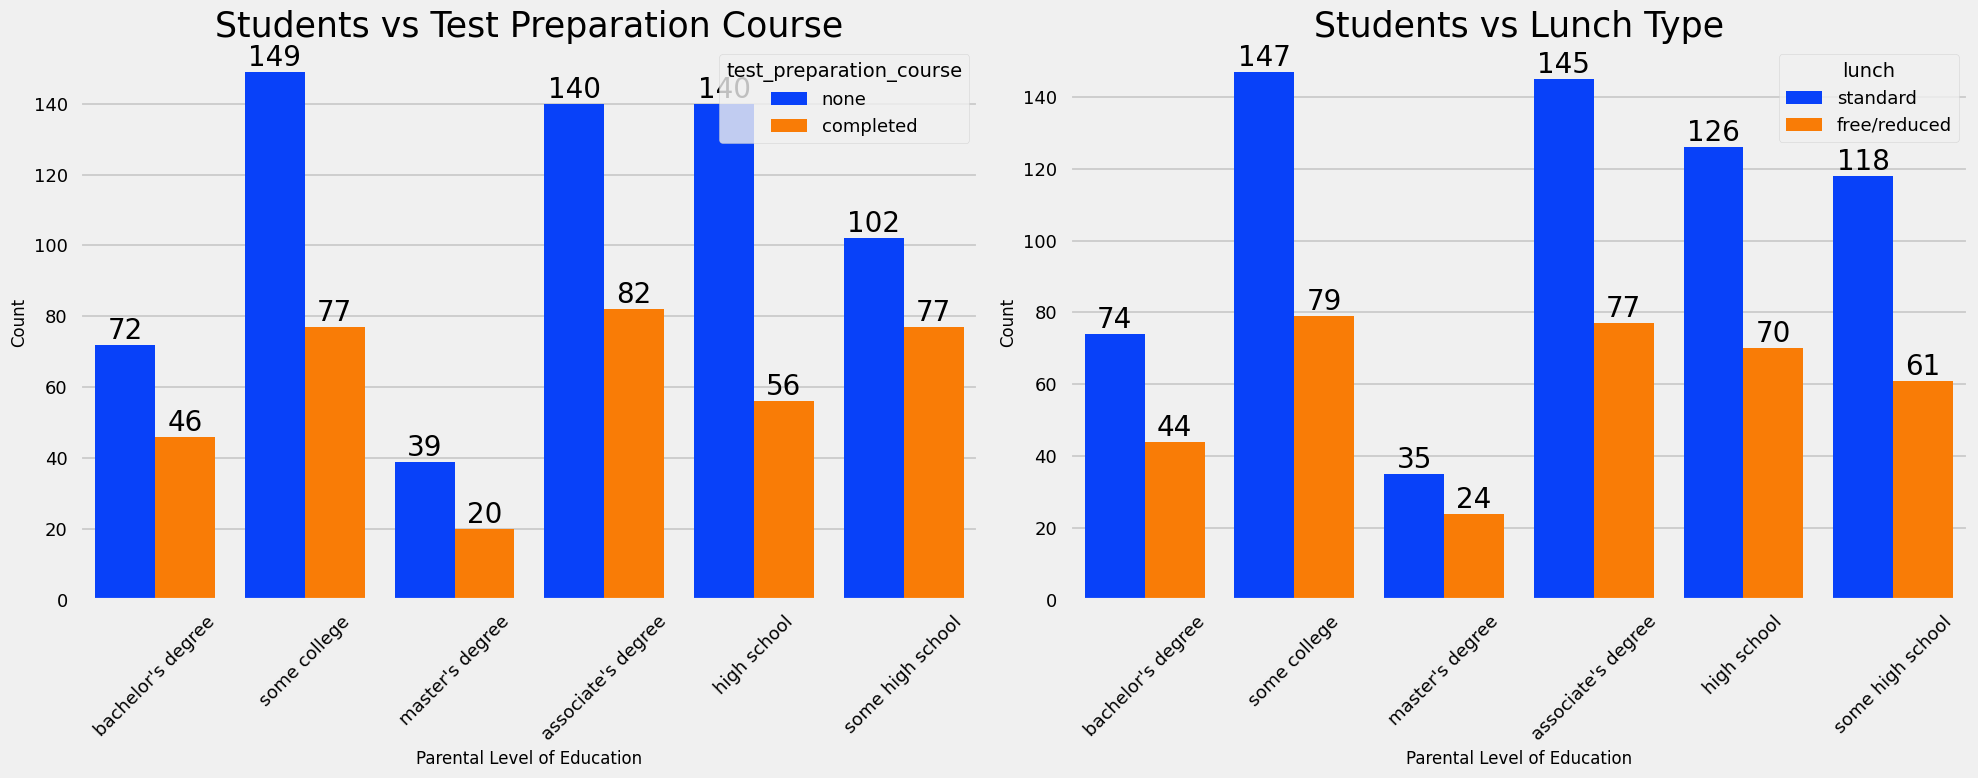

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,8))

# First subplot - Test preparation course by parental education
sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', 
              hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
ax[0].set_xlabel('Parental Level of Education', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
# Second subplot - Lunch type by parental education
sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', 
              hue='lunch', saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs Lunch Type', color='black', size=25)
ax[1].set_xlabel('Parental Level of Education', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.tight_layout()
plt.show()

Insights 

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

## 4.4.5 TEST PREPARATION COURSE COLUMN 

- Does Test prepration course has any impact on student's performance ?

## BIVARIATE ANALYSIS(Does Test prepration course has any impact on student's performance ?) 

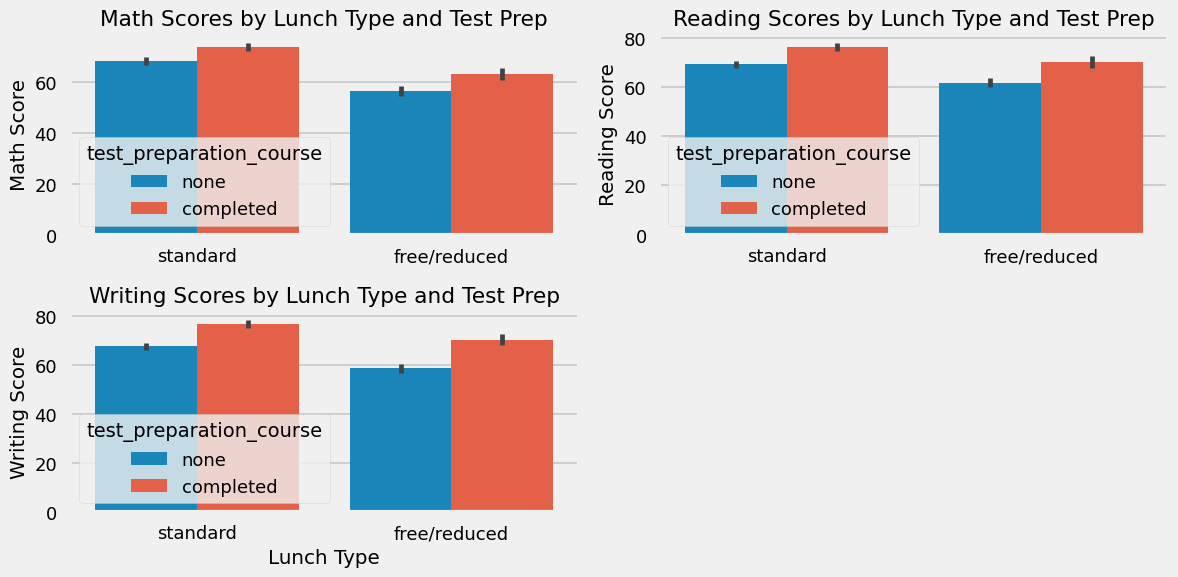

In [41]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.title('Math Scores by Lunch Type and Test Prep')
plt.ylabel('Math Score')
plt.xlabel('')

plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.title('Reading Scores by Lunch Type and Test Prep')
plt.ylabel('Reading Score')
plt.xlabel('')

plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.title('Writing Scores by Lunch Type and Test Prep')
plt.ylabel('Writing Score')
plt.xlabel('Lunch Type')

plt.tight_layout()
plt.show()

Insights

- Students who have completed the Test Preparation Course have scores higher in all three categories than those who haven't taken the course

# 4.4.6 CHECKING OUTLIERS

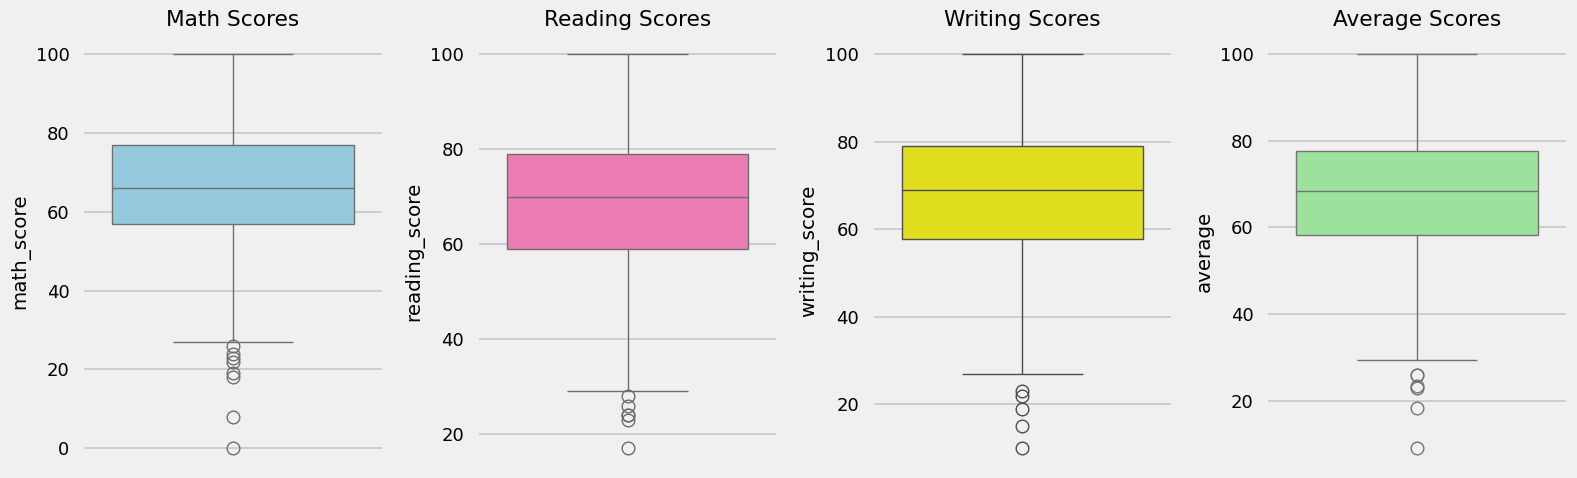

In [43]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(y=df['math_score'],color='skyblue')
plt.title('Math Scores')
plt.subplot(142)
sns.boxplot(y=df['reading_score'],color='hotpink')
plt.title('Reading Scores')
plt.subplot(143)
sns.boxplot(y=df['writing_score'],color='yellow')
plt.title('Writing Scores')
plt.subplot(144)
sns.boxplot(y=df['average'],color='lightgreen')
plt.title('Average Scores')
plt.tight_layout()
plt.show()

# 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

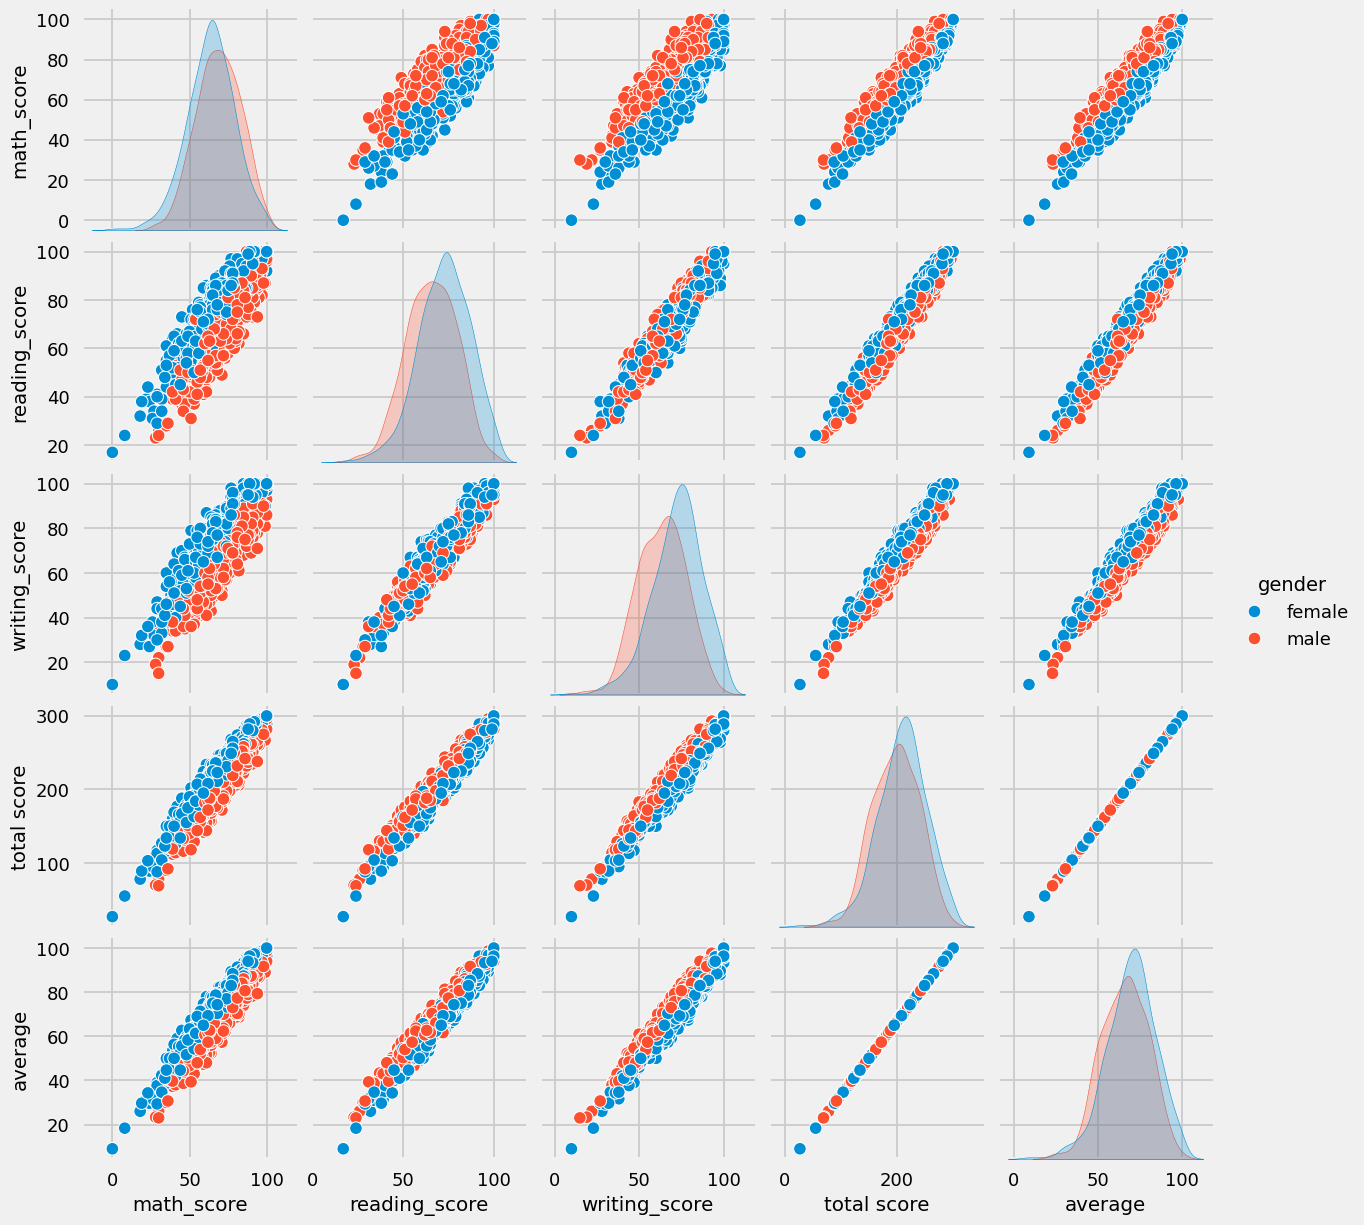

In [44]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights

From the above plot it is clear that all the scores increase linearly with each other.

# 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial